In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix

%matplotlib inline

In [4]:
# Read data
recent_grads = pd.read_csv("datasets/recent-grads.csv")
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [5]:
# Drop rows with missing values
raw_data_count = recent_grads.shape[0]
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count)
print(cleaned_data_count)

nrows = recent_grads.shape[0]
ncols = recent_grads.shape[1]

173
172


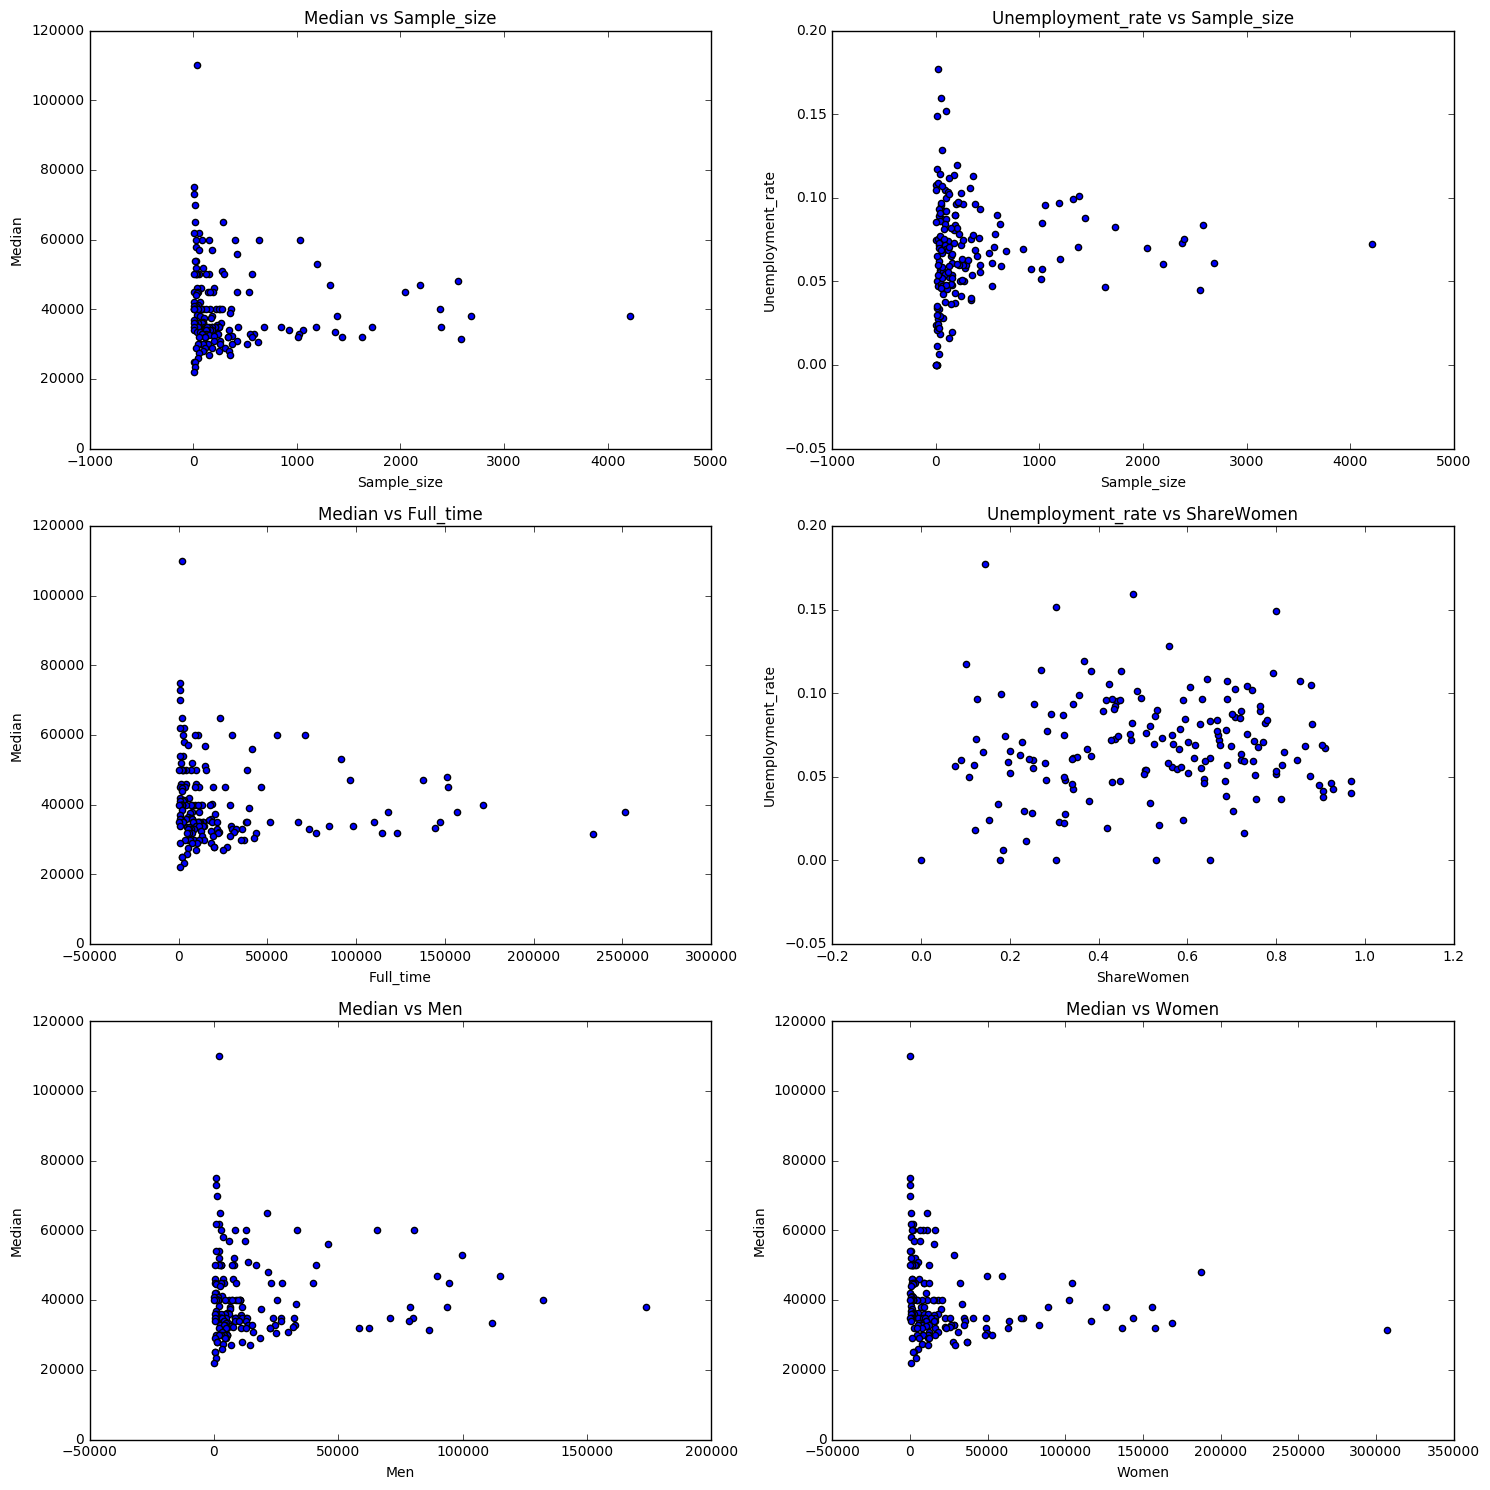

In [31]:
# Finding any correlation between columsn using scatter plots
fig = plt.figure(figsize = (15, 15))

scatter_x_vars = ['Sample_size', 'Sample_size', 'Full_time', 'ShareWomen', 'Men', 'Women']
scatter_y_vars = ['Median', 'Unemployment_rate', 'Median', 'Unemployment_rate', 'Median', 'Median']

for i, x_var in enumerate(scatter_x_vars):
    ax = fig.add_subplot(3, 2, i+1)
    recent_grads.plot(x = x_var, y = scatter_y_vars[i], kind = "scatter",
                        title = scatter_y_vars[i] + " vs " + x_var, ax = ax)
    ax.set_xlabel(x_var)
    ax.set_ylabel(scatter_y_vars[i])
    
fig.tight_layout()  
plt.show()

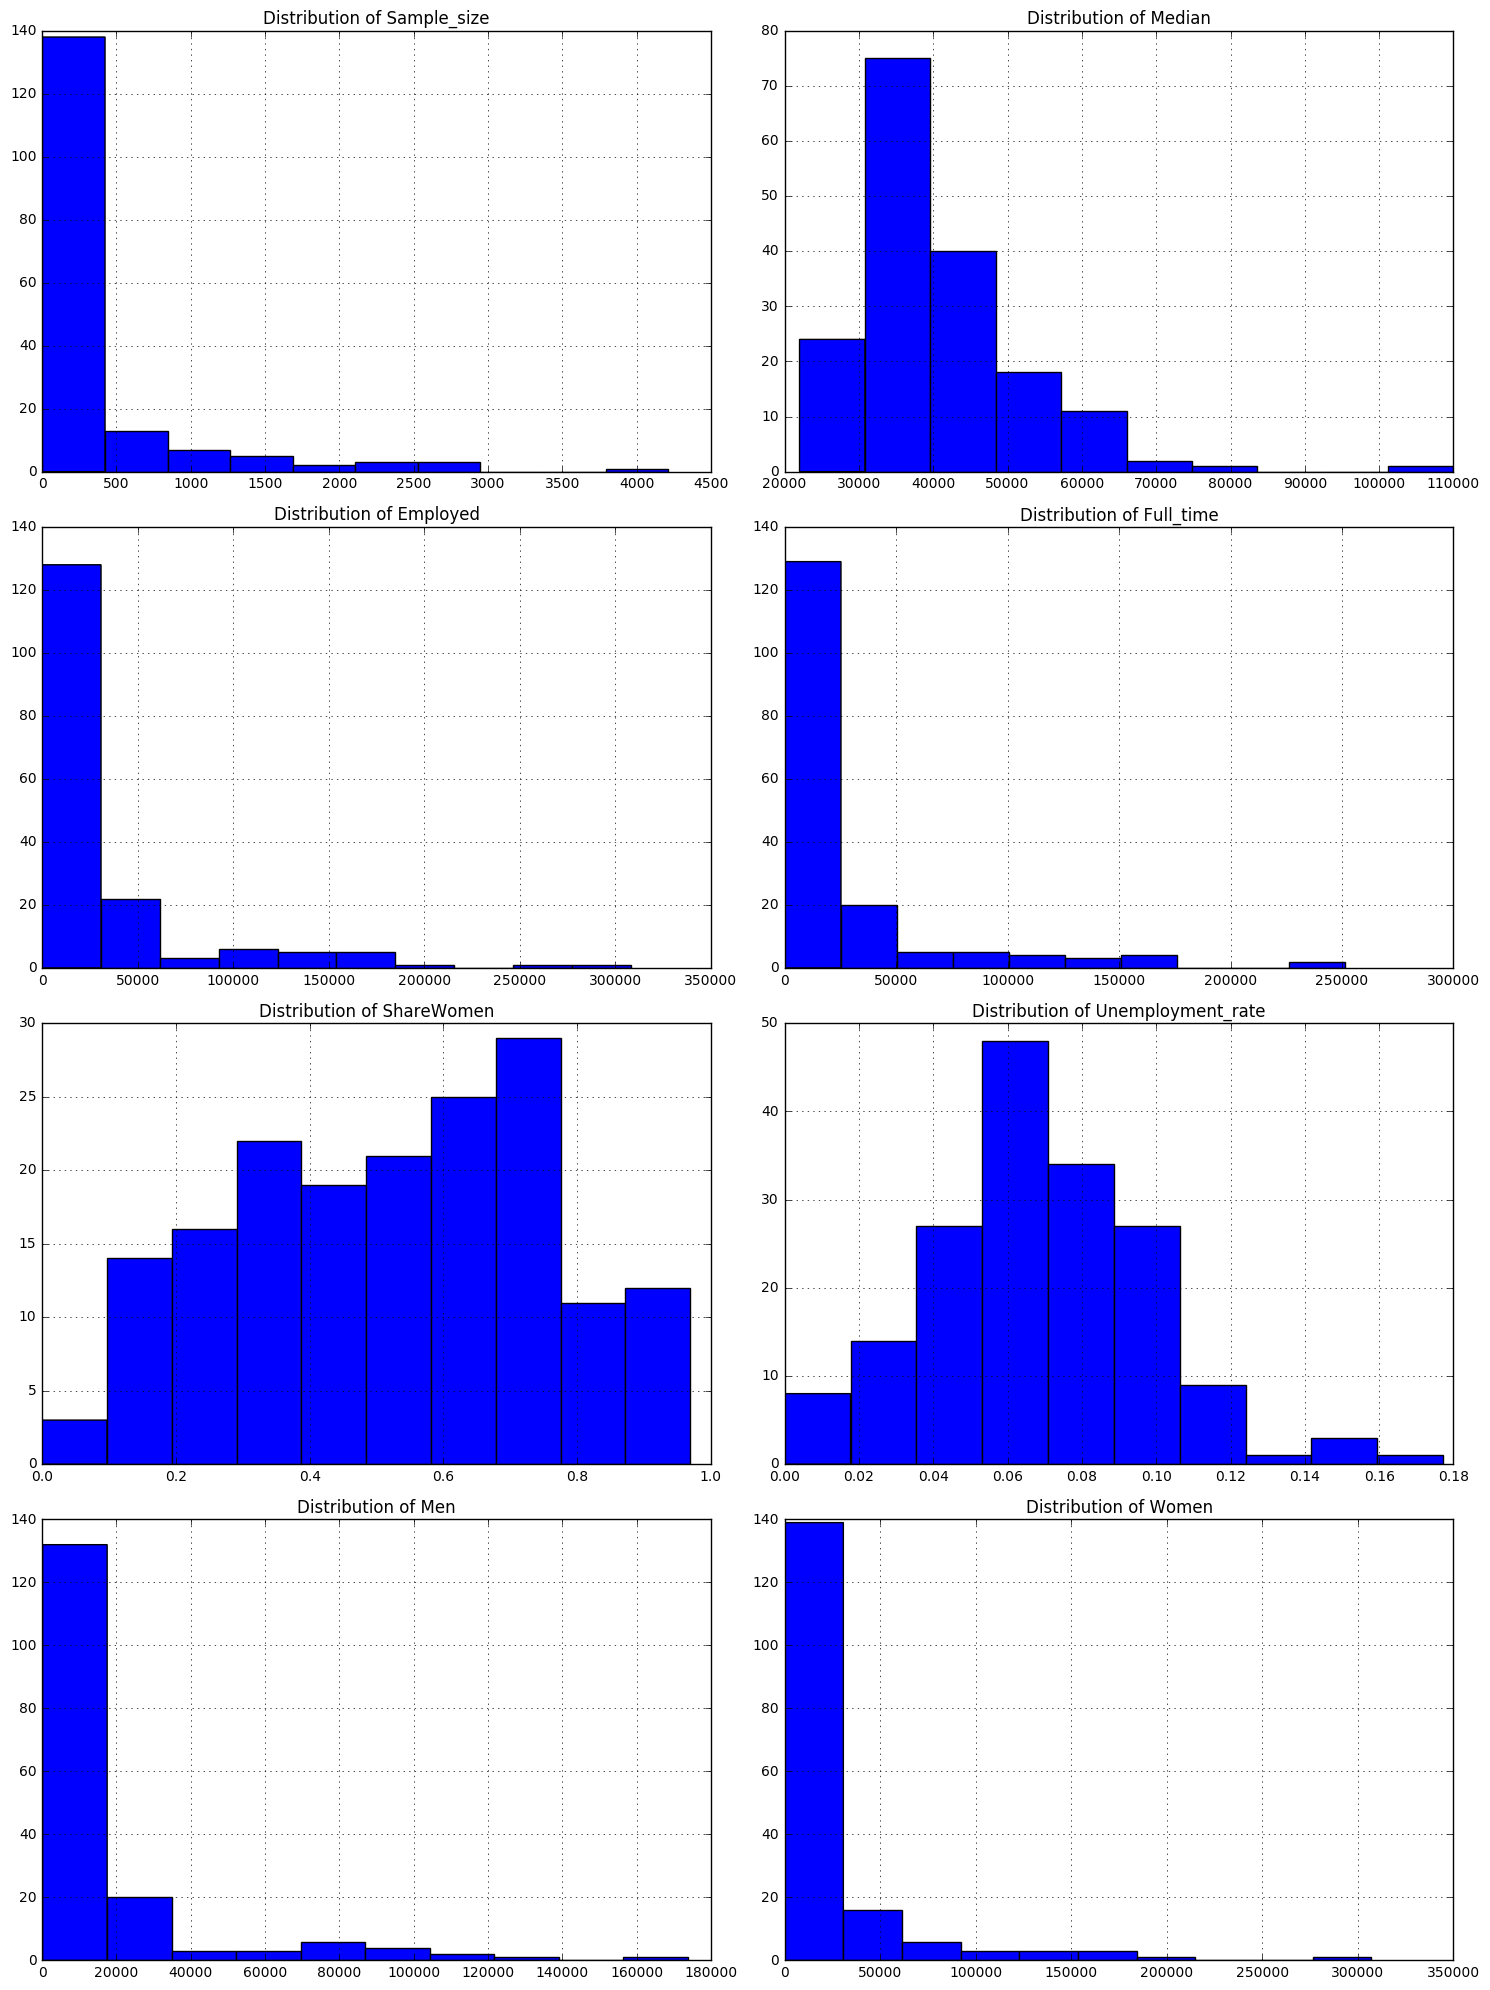

In [32]:
# Histogram for finding distribution of column variables

fig = plt.figure(figsize = (15,20))

hist_col_names = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']

for i, col_name in enumerate(hist_col_names):
    ax = fig.add_subplot(4, 2, i+1)
    recent_grads[col_name].hist(bins = 10, ax = ax)
    ax.set_title("Distribution of "+col_name)

fig.tight_layout()
plt.show()

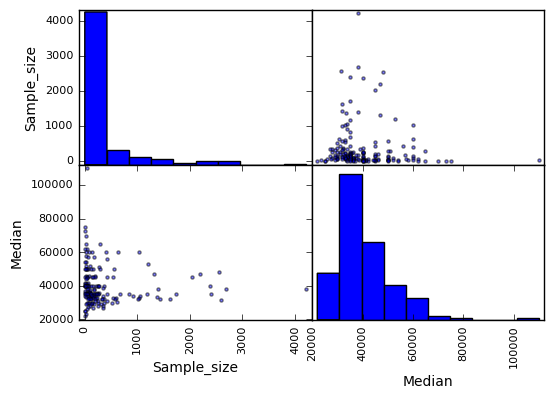

In [34]:
# scatter matrix : need to import from pandas.tools.plotting (combination of bar plots and scatter plots)
scatter_matrix(recent_grads[["Sample_size", "Median"]])
plt.show()

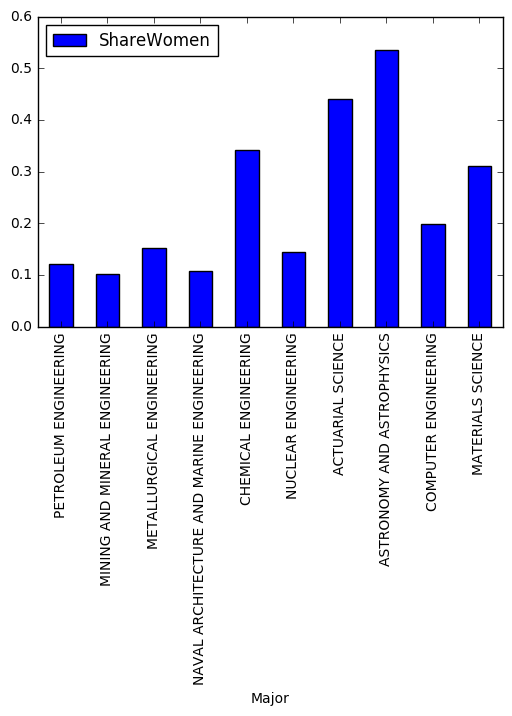

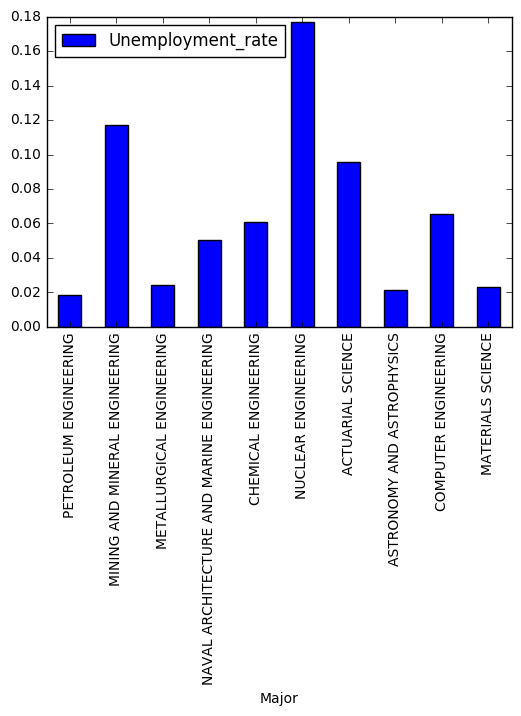

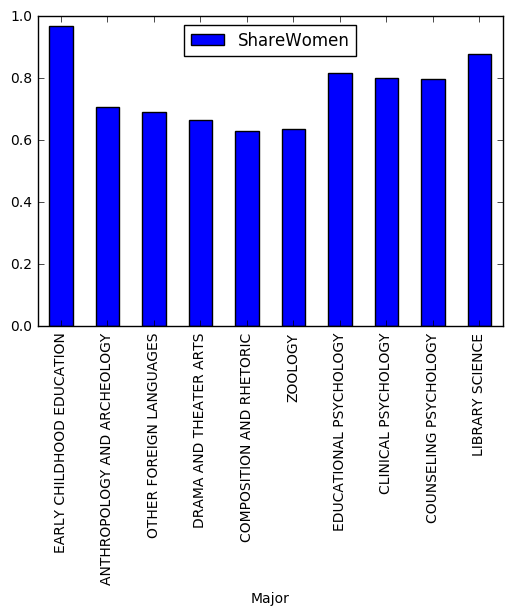

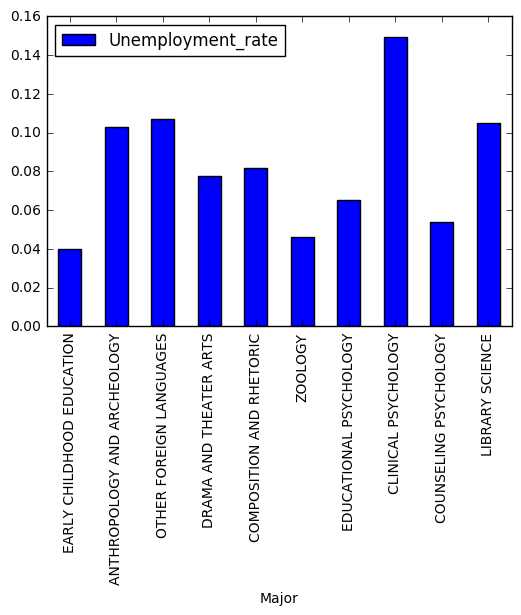

In [45]:
# bar plots using pandas

# sort the DataFrame by "Median"
sorted_recent_grads_sal = recent_grads.sort_values("Median", inplace = False, ascending = False)

heighest_paying = sorted_recent_grads_sal.iloc[0:10]
lowest_paying = sorted_recent_grads_sal.iloc[(nrows-10):nrows]

ax1 = heighest_paying.plot.bar(x = "Major", y = "ShareWomen")
ax2 = heighest_paying.plot.bar(x = "Major", y = "Unemployment_rate")

ax3 = lowest_paying.plot.bar(x = "Major", y = "ShareWomen")
ax4 = lowest_paying.plot.bar(x = "Major", y = "Unemployment_rate")

plt.show()